In [520]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt

df = pd.read_csv('datasets/us_disaster_declarations.csv')
df.head(10)

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61
5,DR-6-MI,6,MI,DR,1953-06-09T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-09T00:00:00Z,1956-03-30T00:00:00Z,26000,0,Statewide,53007,NaN,2023-03-18T13:22:03Z,7c4aed555c671a56be96b52ef381cbf77f5a0ffb,9c154074-6937-473b-8b22-8fe3f54c9998
6,DR-8-IA,8,IA,DR,1953-06-11T00:00:00Z,1953,Flood,Flood,0,1,...,1953-06-11T00:00:00Z,1955-11-01T00:00:00Z,19000,0,Statewide,53008,NaN,2023-03-18T13:22:03Z,84c3cb7dc6a8de3f96ff4a181969c463f924fd08,0d456d0c-8aa5-4fe8-8ee0-44a2d2dd742c
7,DR-7-MA,7,MA,DR,1953-06-11T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-11T00:00:00Z,1956-06-01T00:00:00Z,25000,0,Statewide,53009,NaN,2023-03-18T13:22:03Z,07afc590f5515b8bce699454d205b7aa46297190,7c0a5849-631d-4170-93a3-7c4306dde9c8
8,DR-9-TX,9,TX,DR,1953-06-19T00:00:00Z,1953,Flood,Flood,0,1,...,1953-06-19T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53010,NaN,2023-03-18T13:22:03Z,2efe53c0051ff2f4af480b60b0d94ad6f1fe5611,2277957b-7a84-4abf-9e05-5fd66cbda7b3
9,DR-11-NH,11,NH,DR,1953-07-02T00:00:00Z,1953,Fire,Forest Fire,0,1,...,1953-07-02T00:00:00Z,1956-02-01T00:00:00Z,33000,0,Statewide,53011,NaN,2023-03-18T13:22:03Z,942572c0d5e6acb5766fe079af4f9989ec70ffba,c7799d1d-70a7-4b5c-ae77-7dbc65d9be40


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

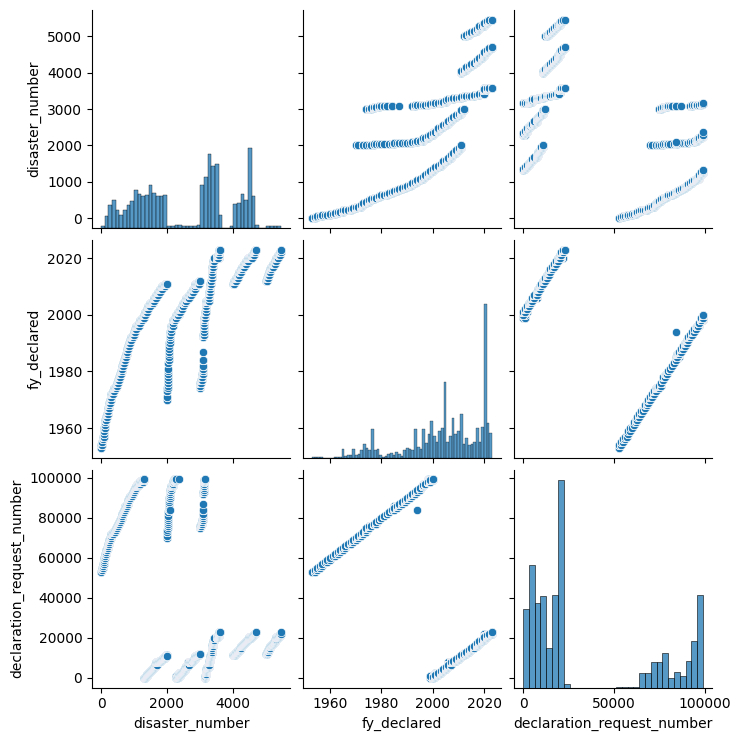

In [522]:
sns.pairplot(df[['disaster_number','fy_declared','incident_type','declaration_request_number']])

In [523]:
disaster_types = df['incident_type'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incident_type'].value_counts())

Types of Disasters reported:

 ['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane'
 'Volcanic Eruption' 'Severe Storm' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snowstorm' 'Severe Ice Storm' 'Freezing'
 'Coastal Storm' 'Fishing Losses' 'Mud/Landslide' 'Human Cause'
 'Terrorist' 'Tsunami' 'Chemical' 'Biological' 'Tropical Storm'
 'Winter Storm']
Occurrences:

 incident_type
Severe Storm         17490
Hurricane            13045
Flood                10693
Biological            7857
Snowstorm             3707
Fire                  3615
Severe Ice Storm      2942
Tornado               1569
Drought               1292
Coastal Storm          637
Other                  307
Freezing               301
Earthquake             228
Typhoon                130
Tropical Storm          54
Volcanic Eruption       51
Winter Storm            43
Fishing Losses          42
Mud/Landslide           37
Dam/Levee Break         13
Tsunami                  9
Chemical                 9
Toxic 

/var/folders/3g/d7474w292nlfzccqcql2xs500000gn/T/ipykernel_7030/2122862841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['incident_type'].value_counts())


<Axes: xlabel='count', ylabel='Density'>

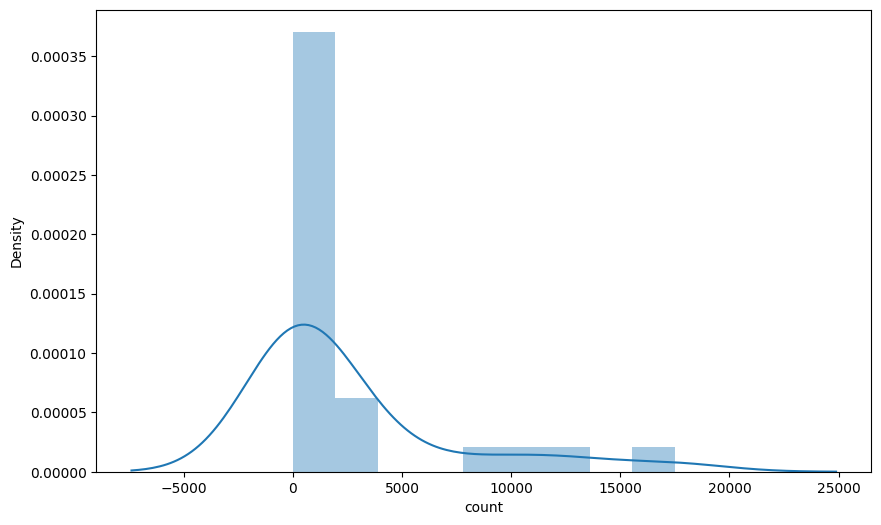

In [524]:
plt.pyplot.figure(figsize=(10,6))
sns.distplot(df['incident_type'].value_counts())

<Axes: xlabel='top', ylabel='freq'>

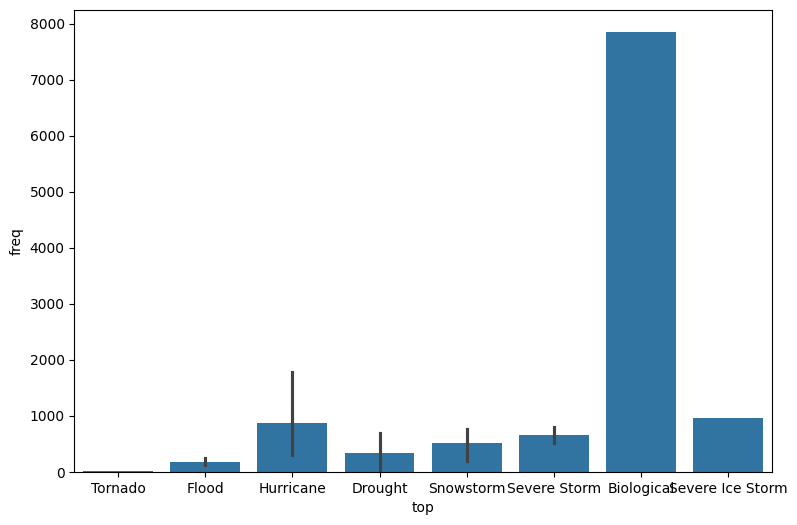

In [525]:
m=df[['fy_declared','incident_type']].groupby('fy_declared').describe()['incident_type'].reset_index()
plt.pyplot.figure(figsize=(9,6))
sns.barplot(x='top',y='freq',data =m)

In [526]:
m=df['fy_declared'].value_counts().reset_index()
m.head(10)

,fy_declared,count
0,2020,9490
1,2005,4692
2,2011,2684
3,2008,2430
4,2021,2158
5,2019,1910
6,2004,1863
7,2017,1835
8,1993,1773
9,1996,1750


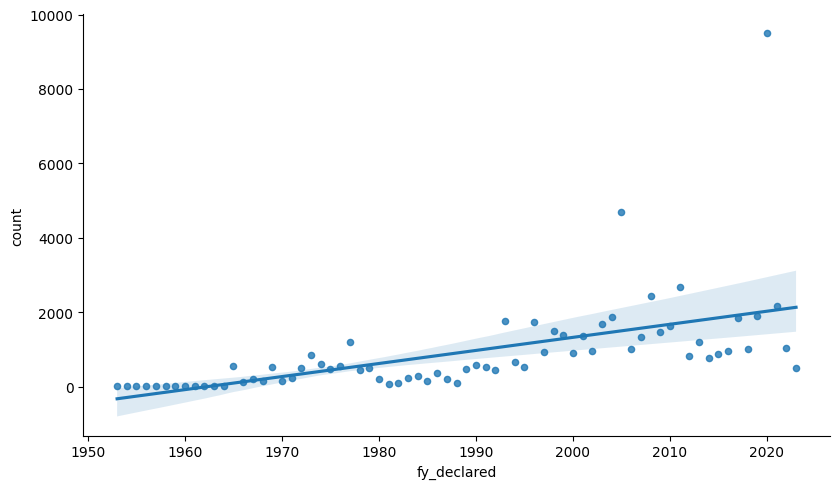

In [527]:
sns.lmplot(x='fy_declared',y='count',data=m.sort_values(by='fy_declared'),
           aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20})

In [528]:
m=df[['state','incident_type']].groupby('state').describe()
m['incident_type'].sort_values(by='count',ascending=False).head(10)

,count,unique,top,freq
state,,,,
TX,5173,11,Hurricane,1303
MO,2704,8,Severe Storm,1339
KY,2583,10,Severe Storm,999
VA,2524,11,Hurricane,877
LA,2493,11,Hurricane,1364
OK,2474,9,Severe Storm,1005
FL,2352,11,Hurricane,1219
GA,2278,10,Hurricane,905
NC,2096,10,Hurricane,1304


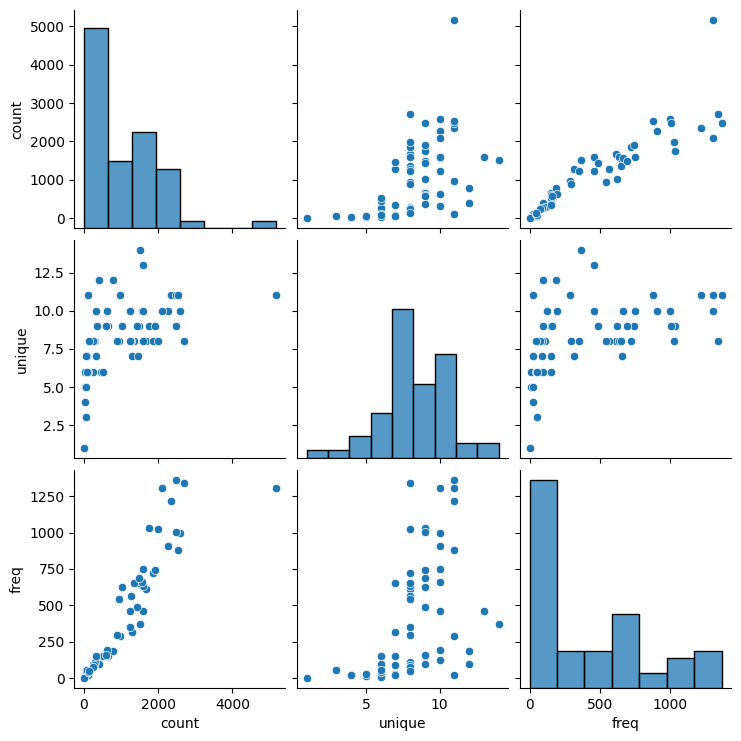

In [529]:
m=df[['state','incident_type']].groupby('state').describe()
sns.pairplot(m['incident_type'].reset_index(drop=True))

In [530]:
m['incident_type'].sort_values(by='freq',ascending=False)['freq'].head(10)

state
LA    1364
MO    1339
NC    1304
TX    1303
FL    1219
KS    1030
PR    1024
OK    1005
KY     999
GA     905
Name: freq, dtype: object

In [531]:
p = df[['state','incident_type']].groupby('state').count()
p.reset_index(inplace=True)
p=p.sort_values(by='incident_type',ascending=False).head(10)
p

,state,incident_type
50,TX,5173
28,MO,2704
20,KY,2583
52,VA,2524
21,LA,2493
41,OK,2474
10,FL,2352
12,GA,2278
32,NC,2096
44,PR,1987


<Axes: xlabel='state', ylabel='incident_type'>

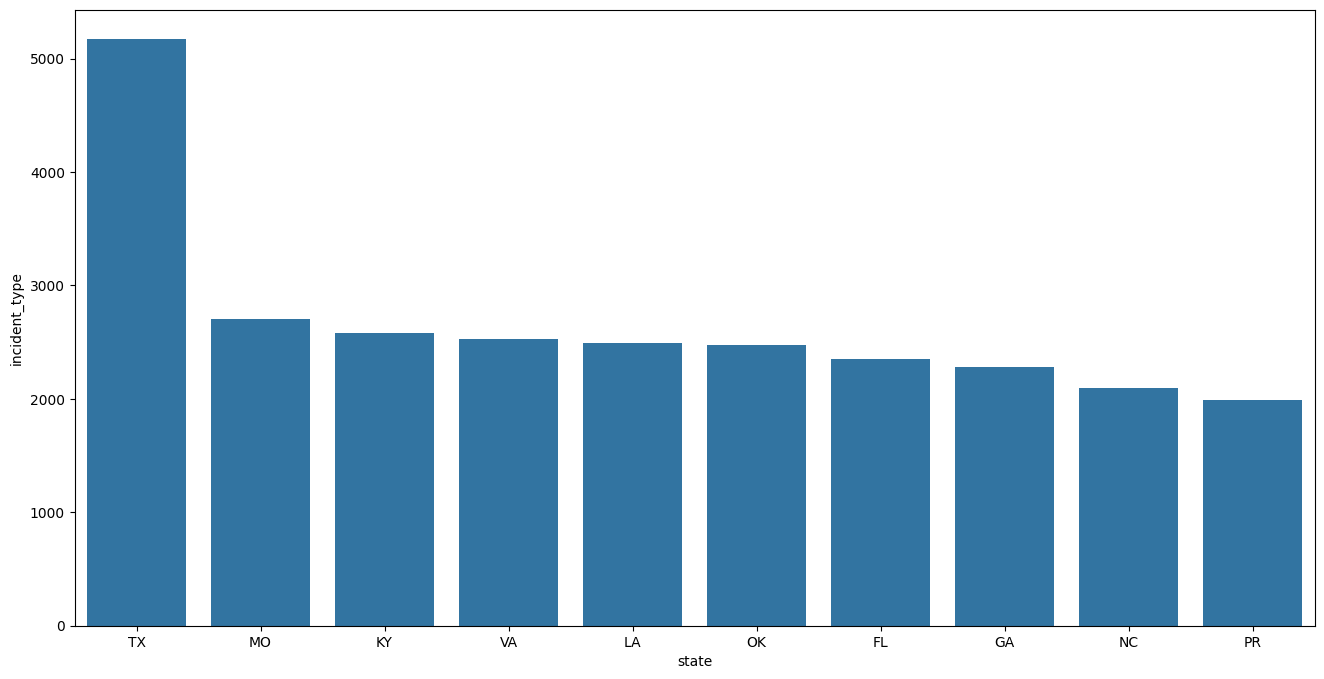

In [532]:
plt.pyplot.figure(figsize=(16,8))
sns.barplot(x="state", y="incident_type", data=p,)

In [533]:
print("Texas mostly faces:\n")
df[['state','incident_type']].groupby('state').max().loc['TX']

Texas mostly faces:



incident_type    Tornado
Name: TX, dtype: object

In [534]:
m=df.query('state=="TX"')['fy_declared'].value_counts().reset_index()
m.head(10)

,fy_declared,count
0,2005,763
1,2020,616
2,2021,513
3,2008,476
4,1999,297
5,1998,293
6,2006,277
7,2011,261
8,2016,168
9,1993,153


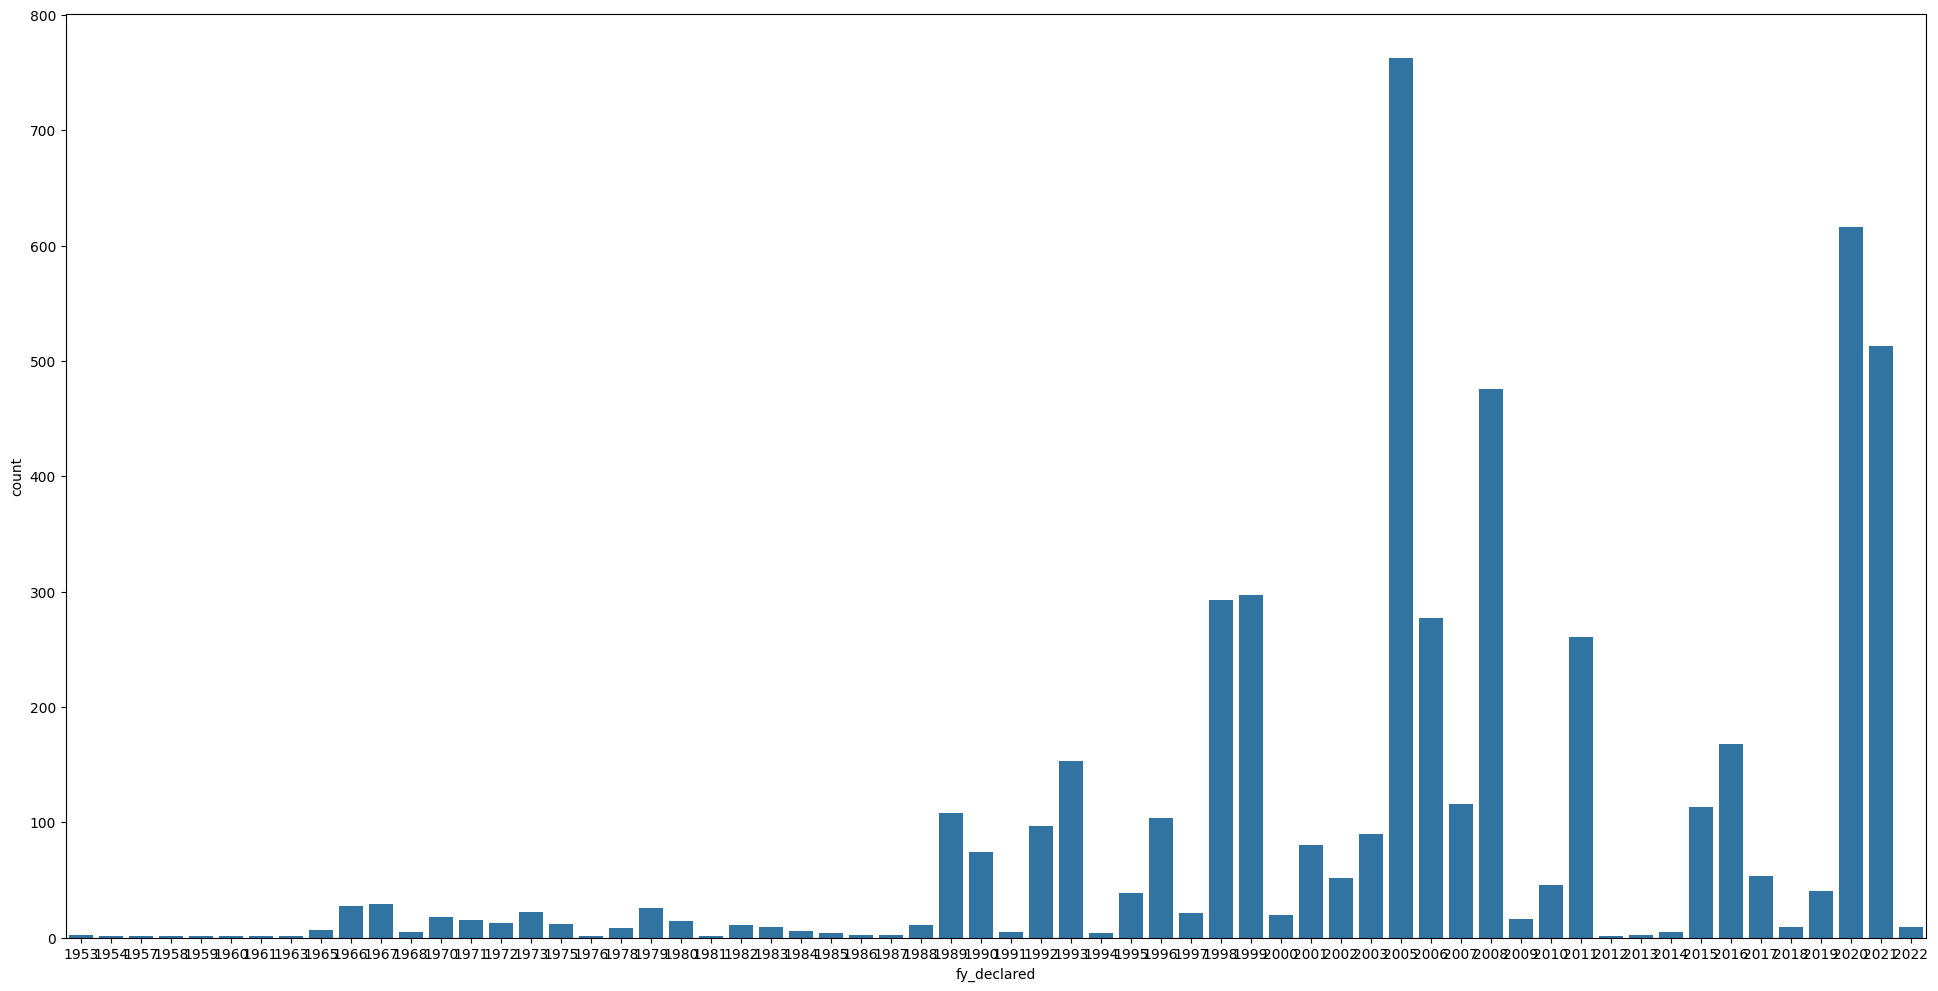

In [535]:
plt.pyplot.figure(figsize=(24,12))
sns.barplot(x='fy_declared',y='count',data=m.sort_values(by='fy_declared'));

In [536]:
df.query('state == "TX" & fy_declared=="2020"')['incident_type'].unique()

array([], dtype=object)

In [537]:
print("Total Areas\n",df['designated_area'].nunique())

Total Areas
 2953


In [538]:
df[['designated_area','incident_type']].groupby('designated_area').count().sort_values(by='incident_type',ascending=False).head(10)

,incident_type
designated_area,
Washington (County),535
Jefferson (County),493
Jackson (County),476
Franklin (County),465
Statewide,464
Lincoln (County),421
Clay (County),370
Montgomery (County),363
Madison (County),355


In [539]:
d = pd.to_datetime(df['declaration_date']).dt
df['year'] = d.year
df['month'] = d.month
df['day'] = d.day
df['time'] = d.time
del df['declaration_date']

In [540]:
df['declaration_type'].value_counts()

declaration_type
DR    43265
EM    18956
FM     1871
Name: count, dtype: int64

In [541]:
df[['year','month','declaration_type']].groupby(['year','month']).describe()

declaration_type                
                      count unique top freq
year month                                 
1953 5                    3      1  DR    3
     6                    6      1  DR    6
     7                    1      1  DR    1
     10                   2      1  DR    2
     12                   1      1  DR    1
...                     ...    ...  ..  ...
2022 11                 113      2  EM   65
     12                  66      2  DR   64
2023 1                  117      3  DR   75
     2                   26      1  DR   26
     3                   83      2  EM   43

[717 rows x 4 columns]

<Axes: xlabel='declaration_type', ylabel='year'>

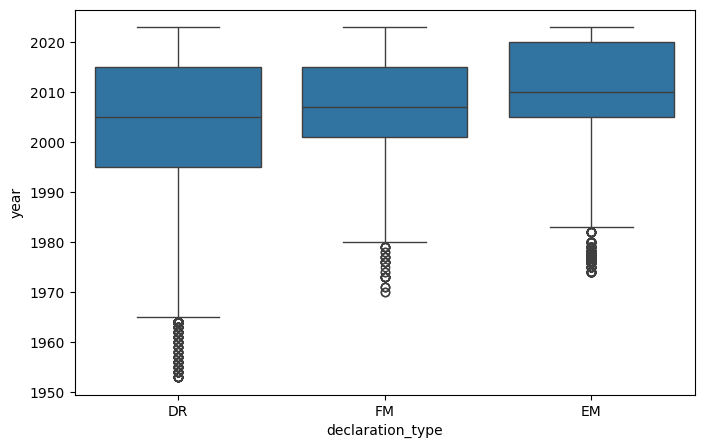

In [542]:
m=df[['year','declaration_type']]
plt.pyplot.figure(figsize=(8,5))
sns.boxplot(x='declaration_type',y='year',data=m)

<Axes: xlabel='declaration_type', ylabel='count'>

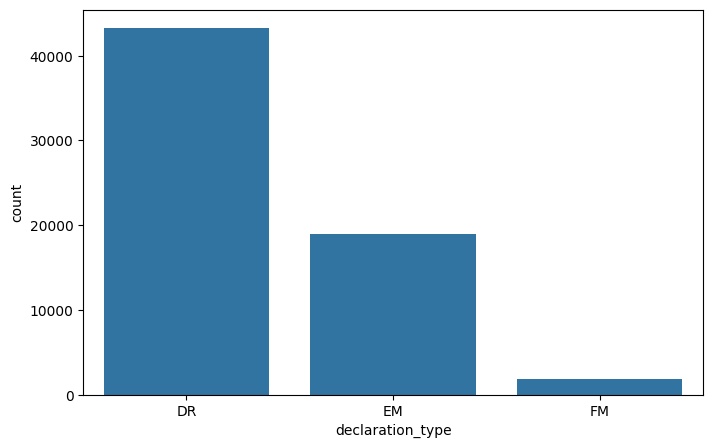

In [543]:
plt.pyplot.figure(figsize=(8,5))
sns.barplot(x='declaration_type',y='count',data=df['declaration_type'].value_counts().reset_index())

In [544]:
m=df[['year','month','day','declaration_type']].groupby(['year','month','day']).count()
m.reset_index().sort_values(by='declaration_type',ascending=False)

,year,month,day,declaration_type
3036,2020,3,13,3692
1774,2005,9,10,777
3052,2020,4,4,744
1772,2005,9,5,647
1776,2005,9,13,615
...,...,...,...,...
1630,2003,9,2,1
1627,2003,8,21,1
1623,2003,8,11,1
1619,2003,7,23,1


In [545]:
#13/03/20
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(2020,3,13))['declaration_title'].value_counts()

Series([], Name: count, dtype: int64)

<Axes: >

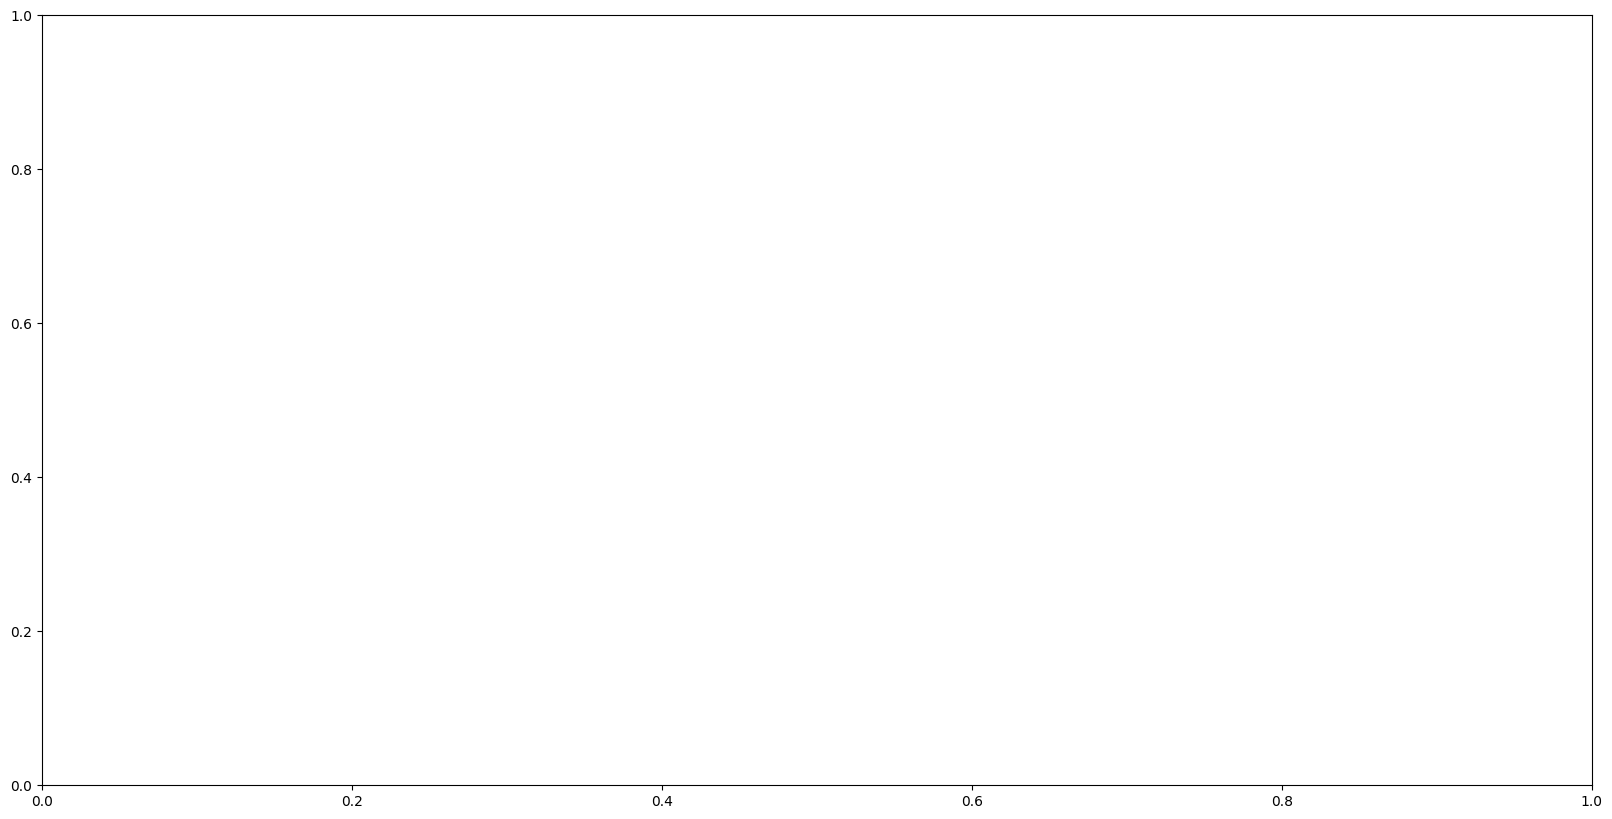

In [546]:
m = df.query('year=="{0}" & declaration_title=="Covid-19"'.format(2020))
plt.pyplot.figure(figsize=(20,10))
sns.countplot(x='state',data=m.sort_values(by='time'))

In [547]:
#13/01/1996
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(1996,1,13))['declaration_title'].unique()

array([], dtype=object)

In [548]:
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(2020,4,4))['declaration_title'].unique()

array([], dtype=object)

In [549]:
#September 2005
m=df.query('year=="{0}" & month=="{1}"'.format(2005,9))
m['declaration_title'].value_counts()

Series([], Name: count, dtype: int64)

<Axes: >

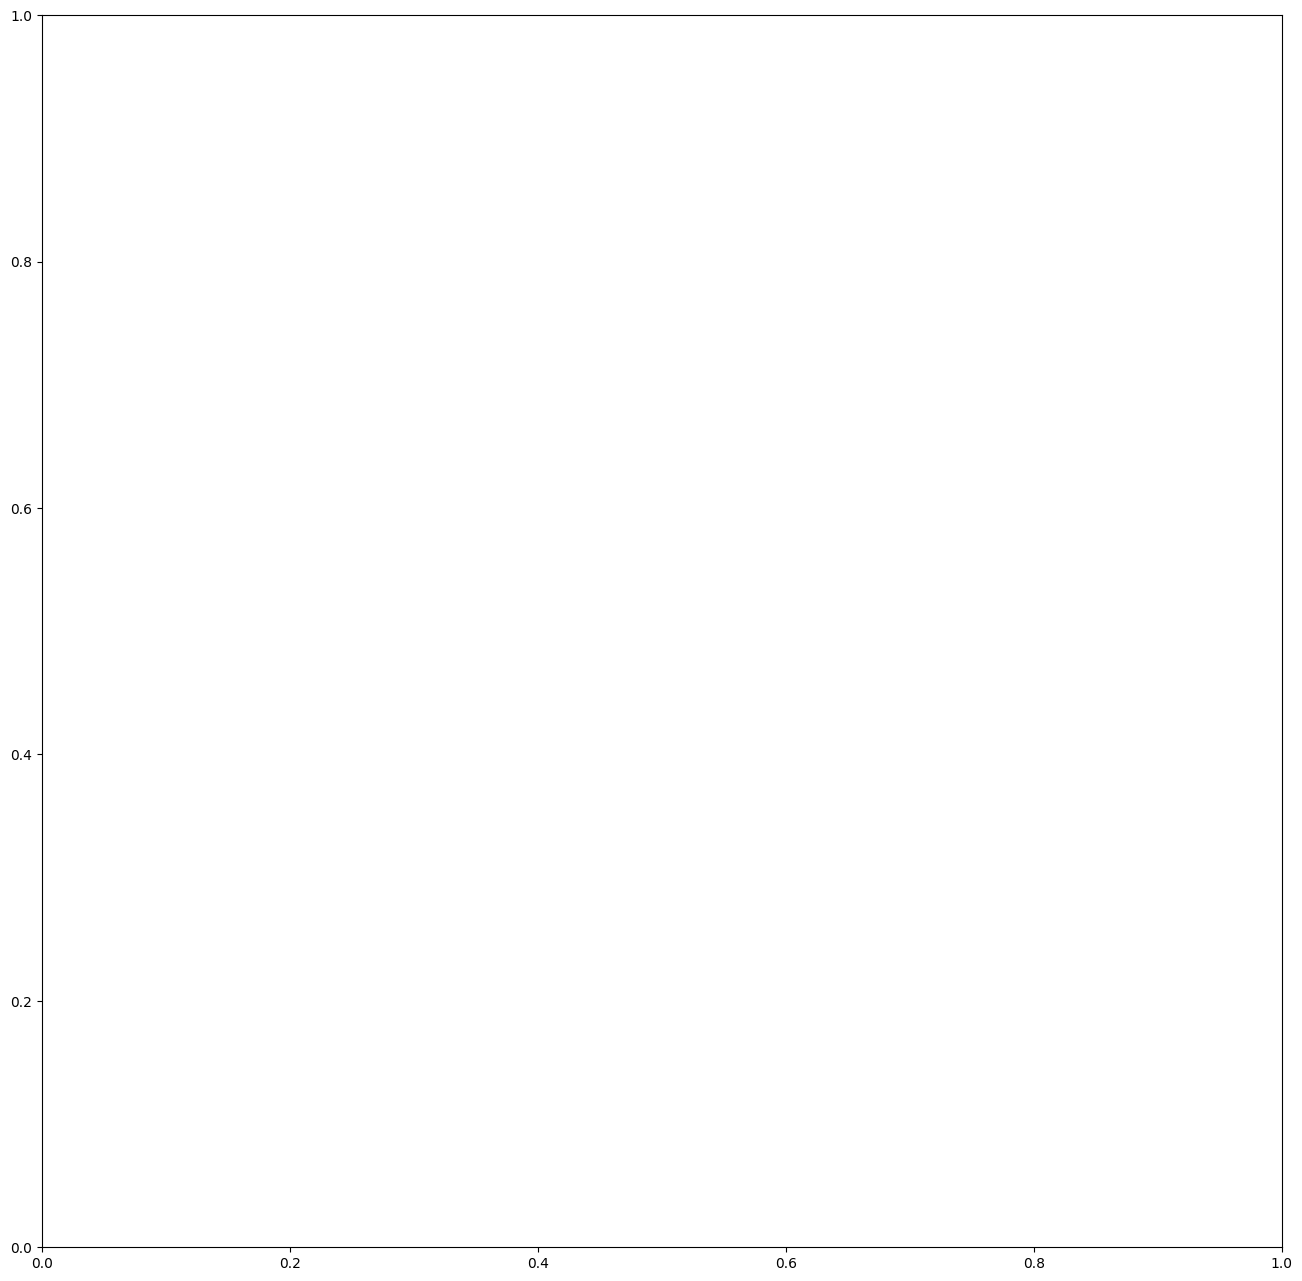

In [550]:
plt.pyplot.figure(figsize=(16,16))
sns.countplot(x='declaration_title',data=m.sort_values(by='time'),hue='state')

In [551]:
m = df.query('ia_program_declared == "0" & ih_program_declared == "0" & pa_program_declared =="0"')
m['incident_type'].value_counts()

Series([], Name: count, dtype: int64)

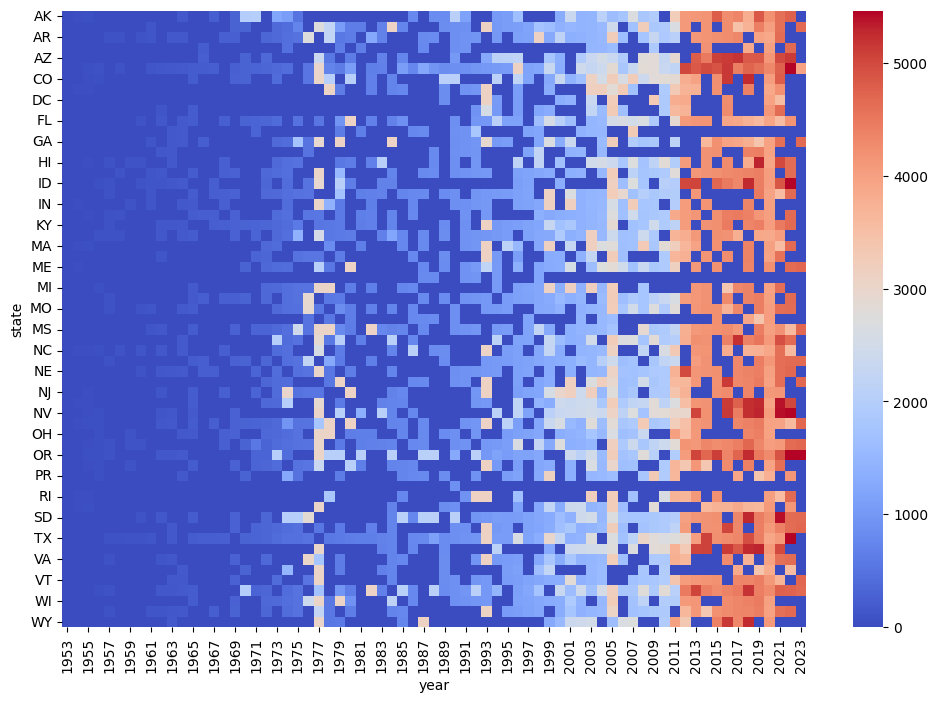

In [552]:
pt = df.pivot_table(values ='disaster_number', index = 'state', columns = 'year').fillna(0)
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(pt, cmap='coolwarm')
plt.pyplot.savefig('heatmap.png')

In [553]:
def stateGraph(stateInput):
    state = 'state == "' + str(stateInput) + '"'
    c=df.query(state)['incident_type'].value_counts().reset_index()
    c.head(10)
    return plt.pyplot.figure(figsize=(24,12)), sns.barplot(x='incident_type',y='count',data=c.sort_values(by='incident_type'))

(<Figure size 2400x1200 with 1 Axes>,
 <Axes: xlabel='incident_type', ylabel='count'>)

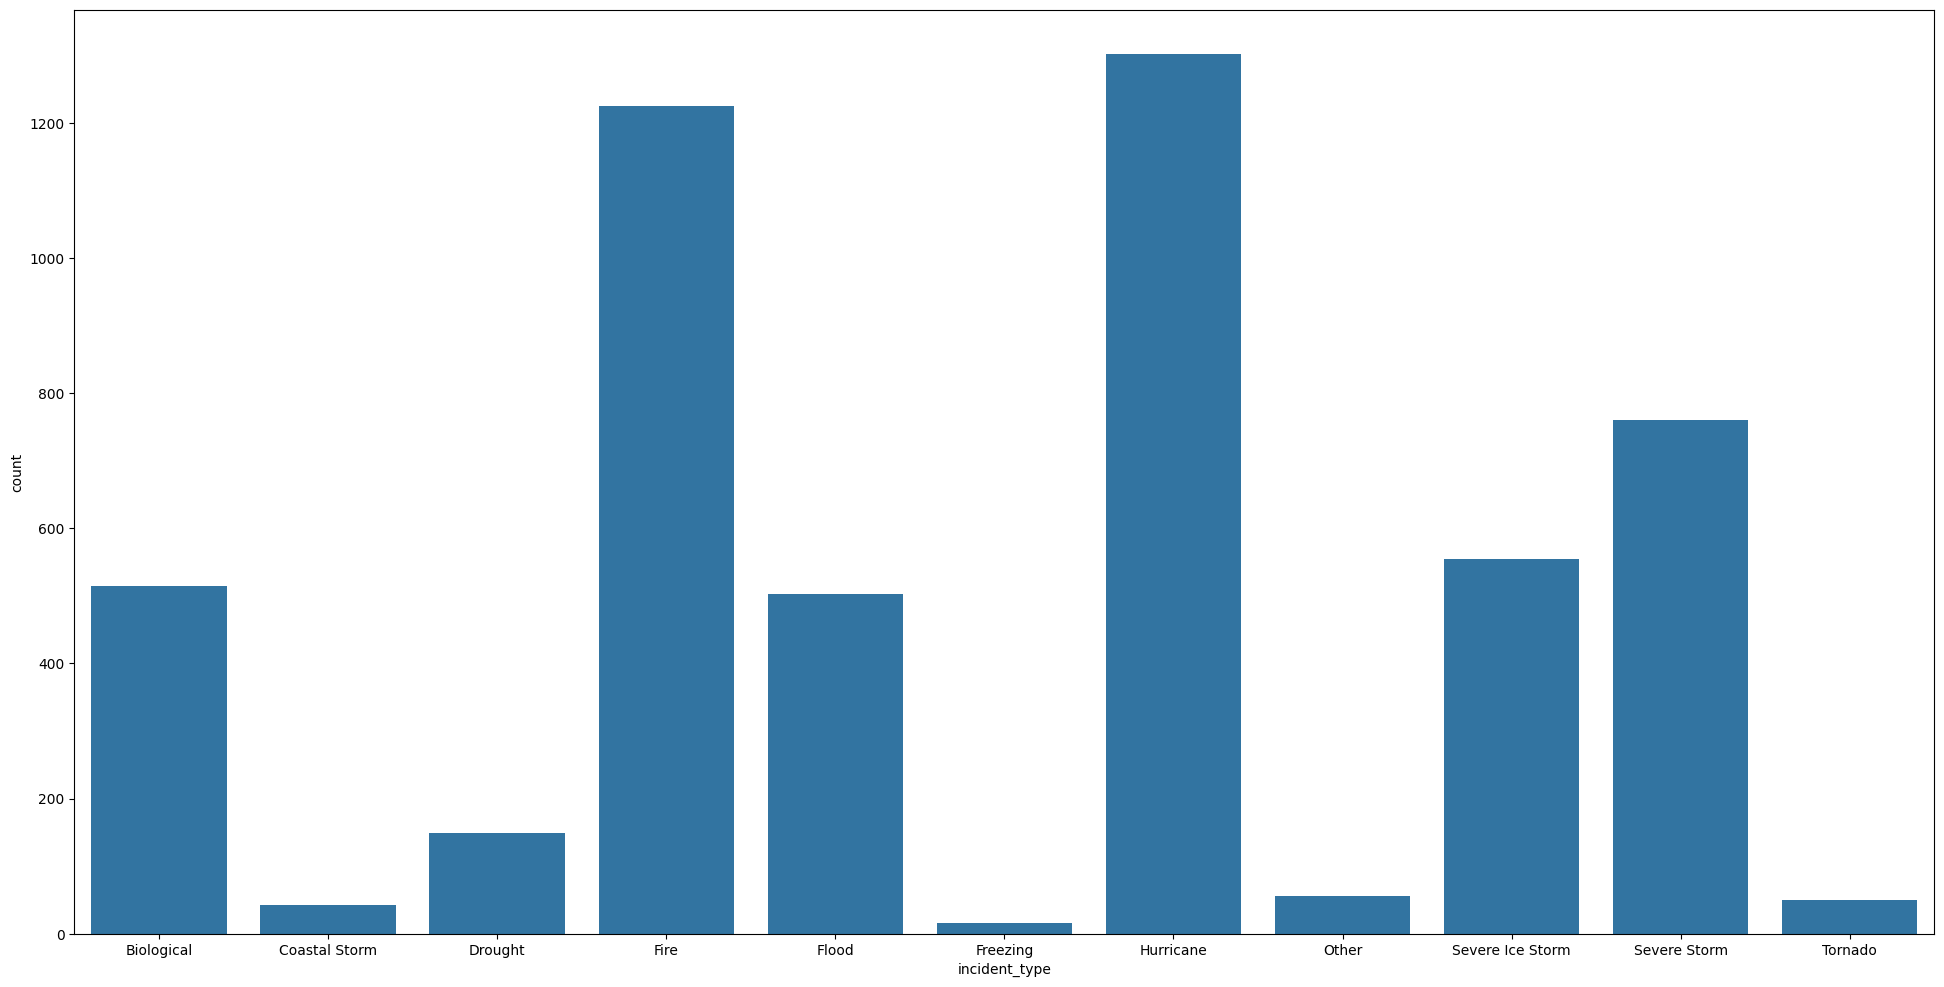

In [554]:
stateGraph("TX")